<a href="https://colab.research.google.com/github/Zaxzz/Visi_Komputer/blob/main/Jobsheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana

### Praktikum

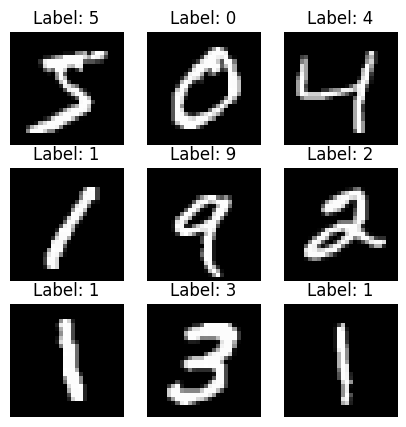

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


### Tugas kecil

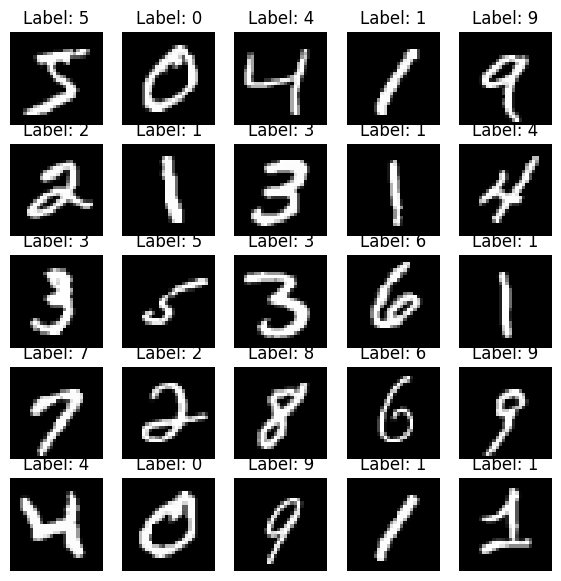

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan contoh
plt.figure(figsize=(7, 7))
for i in range(25):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


## 2. Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional

### Praktikum

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat

y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Akurasi: 0.1693


### Penugasan

In [ ]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====
import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)

    arr = np.array(img).astype(np.uint8)
    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1+1, y1+1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w)//2, (28 - h)//2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0
    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr


Saving angka.png to angka (1).png


In [ ]:
import numpy as np
from sklearn import svm
from sklearn.datasets import fetch_openml
from PIL import Image

print("Memuat dataset MNIST...")
X_train, y_train = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

X_train = X_train / 255.0

X_subset = X_train[:10000]
y_subset = y_train[:10000]

clf = svm.SVC(kernel='rbf', gamma='scale', probability=True)

print("Training the SVM classifier...")
clf.fit(X_subset, y_subset)
print("Pelatihan selesai.")

results = []
for fname in uploaded.keys():
    try:
        img_pil = Image.open(fname)

        _, x = preprocess_to_mnist_28x28(img_pil)

        x_flat = x.reshape(1, -1).astype(np.float64)

        pred = int(clf.predict(x_flat)[0])

        conf = None
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))

        results.append((fname, pred, conf))
        print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf is not None else ""))

    except Exception as e:
        print(f"Error pada {fname}: {e}")


Memuat dataset MNIST...
Training the SVM classifier...
Pelatihan selesai.
angka (1).png -> Prediksi SVM: 4 (p≈0.50)


### Tugas kecil

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0

# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])  # gunakan subset karena SVM berat

y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))


Akurasi: 0.9513


## 3. Praktikum D3 – Membangun CNN Sederhana

### Praktikum

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 42ms/step - accuracy: 0.3637 - loss: 1.7431 - val_accuracy: 0.5534 - val_loss: 1.2480
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 87s 46ms/step - accuracy: 0.5734 - loss: 1.2019 - val_accuracy: 0.6178 - val_loss: 1.0684
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 42ms/step - accuracy: 0.6380 - loss: 1.0331 - val_accuracy: 0.6404 - val_loss: 1.0095
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.6723 - loss: 0.9395 - val_accuracy: 0.6746 - val_loss: 0.9452
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.6991 - loss: 0.8579 - val_accuracy: 0.6856 - val_loss: 0.9212
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7220 - loss: 0.7977 - val_accuracy: 0.6768 - val_loss: 0.9402
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.7429 - loss: 0.7389 - val_accuracy: 0.6948 - val_loss: 0.8916
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.7623 -

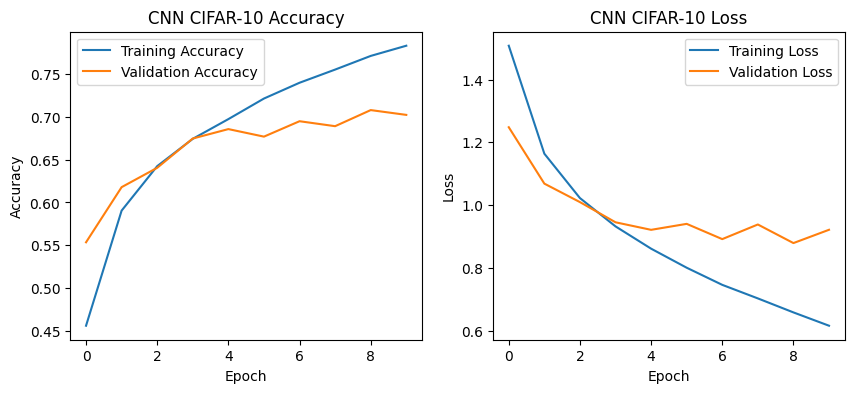

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_cnn = x_train / 255.0
x_test_cnn = x_test / 255.0

# Model CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train_cnn, y_train,
    epochs=10,
    validation_split=0.1
)

# Plot hasil training
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.3487 - loss: 1.7512 - val_accuracy: 0.5222 - val_loss: 1.3214
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.5793 - loss: 1.1868 - val_accuracy: 0.5930 - val_loss: 1.1366
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 48ms/step - accuracy: 0.6452 - loss: 1.0103 - val_accuracy: 0.6670 - val_loss: 0.9549
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.6876 - loss: 0.8873 - val_accuracy: 0.7008 - val_loss: 0.8753
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 48ms/step - accuracy: 0.7213 - loss: 0.7994 - val_accuracy: 0.7088 - val_loss: 0.8527
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 48ms/step - accuracy: 0.7472 - loss: 0.7146 - val_accuracy: 0.7012 - val_loss: 0.8687
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 68s 48ms/step - accuracy: 0.7660 - loss: 0.6668 - val_accuracy: 0.6954 - val_loss: 0.9174
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.7927 -

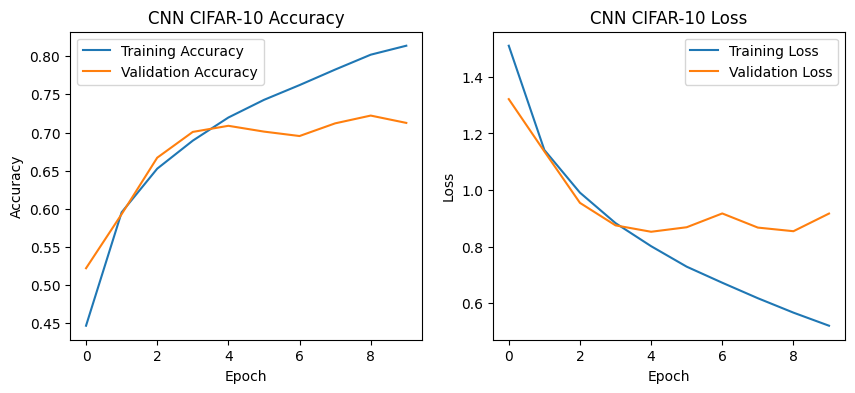

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi
x_train_cnn = x_train / 255.0
x_test_cnn = x_test / 255.0

# Model CNN dengan tambahan 1 Conv2D sebelum Flatten
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),  # ✅ tambahan Conv2D baru
    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    x_train_cnn, y_train,
    epochs=10,
    validation_split=0.1
)

# Evaluasi di test set
test_loss, test_acc = model.evaluate(x_test_cnn, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

# Plot hasil training
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 4. Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)

### Praktikum

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 45ms/step - accuracy: 0.3685 - loss: 1.7256 - val_accuracy: 0.5534 - val_loss: 1.2295
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 43ms/step - accuracy: 0.5884 - loss: 1.1690 - val_accuracy: 0.6382 - val_loss: 1.0454
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6384 - loss: 1.0336 - val_accuracy: 0.6518 - val_loss: 1.0052
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 84s 44ms/step - accuracy: 0.6771 - loss: 0.9223 - val_accuracy: 0.6770 - val_loss: 0.9388
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7008 - loss: 0.8647 - val_accuracy: 0.6940 - val_loss: 0.9025
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7213 - loss: 0.8033 - val_accuracy: 0.6906 - val_loss: 0.8948
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.7345 - loss: 0.7543 - val_accuracy: 0.7100 - val_loss: 0.8784
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7566 -

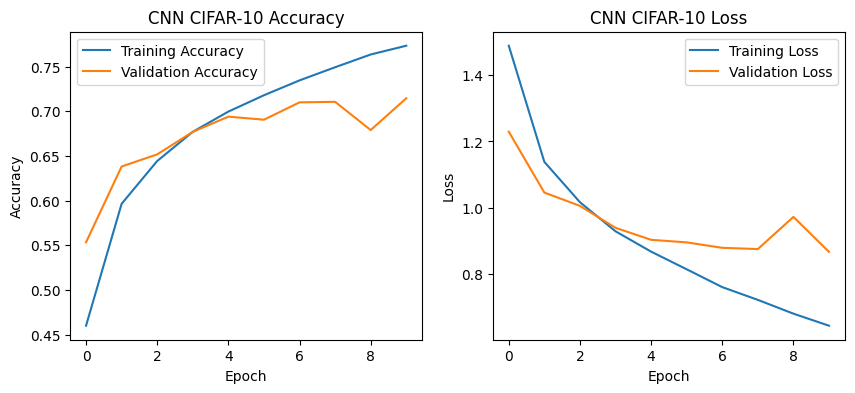

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1
)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 74s 51ms/step - accuracy: 0.2678 - loss: 1.9532 - val_accuracy: 0.4866 - val_loss: 1.4366
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 51ms/step - accuracy: 0.4340 - loss: 1.5385 - val_accuracy: 0.5670 - val_loss: 1.2526
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.4900 - loss: 1.3977 - val_accuracy: 0.6004 - val_loss: 1.1783
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.5243 - loss: 1.3157 - val_accuracy: 0.6216 - val_loss: 1.1025
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.5552 - loss: 1.2425 - val_accuracy: 0.6358 - val_loss: 1.0458
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.5697 - loss: 1.1998 - val_accuracy: 0.6470 - val_loss: 1.0092
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 66s 47ms/step - accuracy: 0.5921 - loss: 1.1448 - val_accuracy: 0.6548 - val_loss: 0.9814
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6017 -

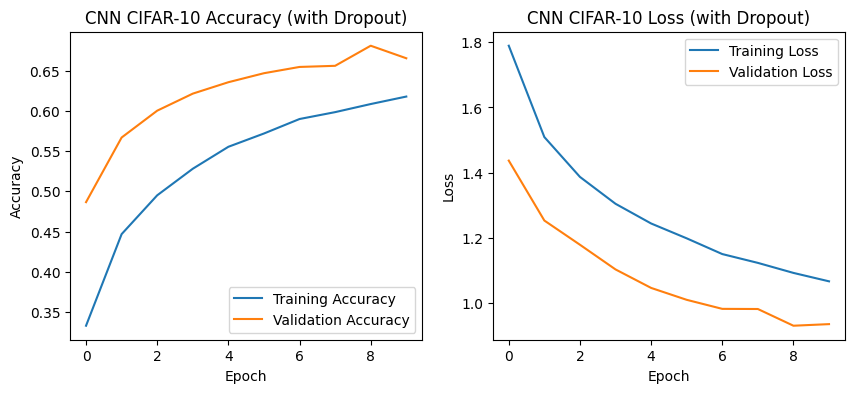

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build model dengan Dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Tambahan untuk kurangi overfitting
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1
)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy (with Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss (with Dropout)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 5. Praktikum D5 – Transfer Learning dengan Model Pra-Latih

### Praktikum

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 680s 482ms/step - accuracy: 0.4544 - loss: 1.5530 - val_accuracy: 0.5734 - val_loss: 1.2195
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 671s 477ms/step - accuracy: 0.5757 - loss: 1.2131 - val_accuracy: 0.5874 - val_loss: 1.1758
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 655s 458ms/step - accuracy: 0.6002 - loss: 1.1490 - val_accuracy: 0.5910 - val_loss: 1.1604
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 712s 479ms/step - accuracy: 0.6132 - loss: 1.1049 - val_accuracy: 0.6080 - val_loss: 1.1319
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 676s 481ms/step - accuracy: 0.6286 - loss: 1.0621 - val_accuracy: 0.6048 - val_loss: 1.1153


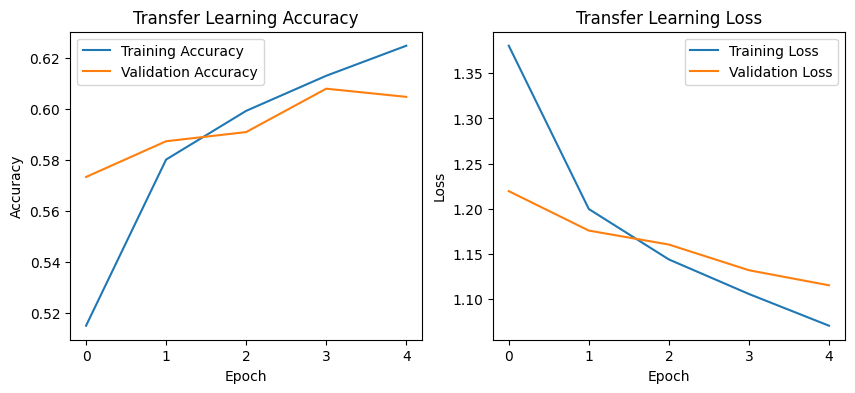

In [ ]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Tugas kecil

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 640s 453ms/step - accuracy: 0.5053 - loss: 1.4237 - val_accuracy: 0.5974 - val_loss: 1.1425
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 676s 449ms/step - accuracy: 0.6249 - loss: 1.0660 - val_accuracy: 0.6458 - val_loss: 1.0144
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 681s 448ms/step - accuracy: 0.6607 - loss: 0.9680 - val_accuracy: 0.6368 - val_loss: 1.0418
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 632s 449ms/step - accuracy: 0.6762 - loss: 0.9237 - val_accuracy: 0.6578 - val_loss: 0.9830
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 597s 424ms/step - accuracy: 0.6902 - loss: 0.8751 - val_accuracy: 0.6682 - val_loss: 0.9666


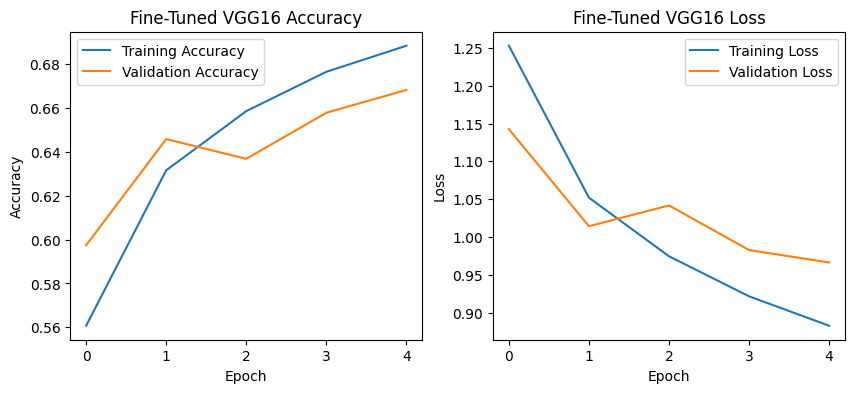

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load dataset CIFAR-10
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False  # Freeze semua layer dulu

# Aktifkan 2 layer terakhir untuk fine-tuning
for layer in base_model.layers[-2:]:
    layer.trainable = True

# Bangun model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)

# ===== Plot history =====
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Fine-Tuned VGG16 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Fine-Tuned VGG16 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


## 6. Praktikum D6 – Evaluasi dengan Confusion Matrix dan Metrik Lain

### Praktikum

313/313 ━━━━━━━━━━━━━━━━━━━━ 117s 371ms/step
              precision    recall  f1-score   support

           0       0.83      0.56      0.67      1000
           1       0.84      0.66      0.74      1000
           2       0.58      0.62      0.60      1000
           3       0.54      0.42      0.47      1000
           4       0.51      0.72      0.60      1000
           5       0.57      0.57      0.57      1000
           6       0.71      0.68      0.70      1000
           7       0.74      0.69      0.71      1000
           8       0.69      0.85      0.76      1000
           9       0.66      0.79      0.72      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.65     10000
weighted avg       0.67      0.65      0.65     10000



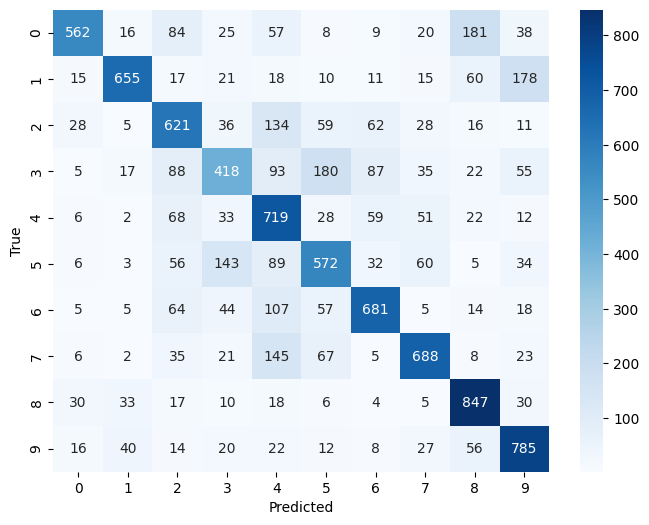

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
